# Histogram filter

Assume we have a robot that can be in one of five blocks. With no other info we calculate the probability of the robot being in each such and plot a histogram of the probabilities:

In [150]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, signal

<BarContainer object of 5 artists>

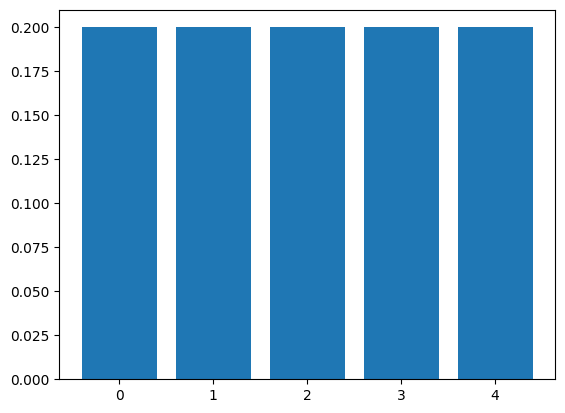

In [151]:
no_of_blocks = 5
prb = 1/5

p = [prb, prb, prb, prb, prb]

plt.bar(range(no_of_blocks), p)

Now we say that each block is either red or green and that our robot can sense that colour. We multiply all the correct sensings with 0.6 and the incorrect with 0.2. These values are arbitrary and just represent that the robot has a higher probability to be at a red block if that is what is measured.

In the following we define the world and make a function that calculates the new probabilities by using the measurement. We then try it out with a measurement of 'red'.

Notice that we divide each probability with the sum of all probabilities in order to get something that adds up to one.

[0.11111111 0.33333333 0.33333333 0.11111111 0.11111111]


<BarContainer object of 5 artists>

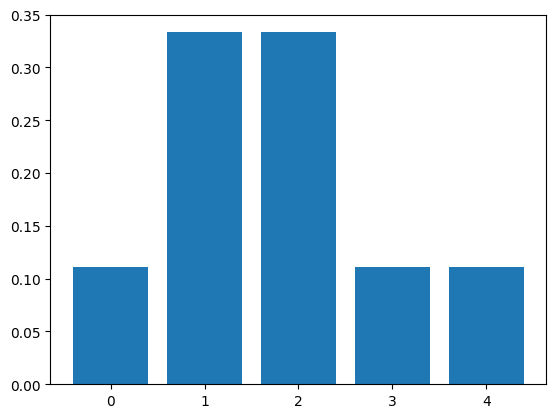

In [152]:
no_of_blocks = 5
prb = 1/5
p = [prb, prb, prb, prb, prb]

world = ['green', 'red', 'red', 'green', 'green']
z = 'red' # Measurement
pHit = 0.6
pMiss = 0.2

def sense(p,z):
    q = []
    for i in range(len(world)):
        hit = (z == world[i]) # True if measurement matches this part of the world, false if not.
        q.append(p[i]*(hit * pHit + (1- hit) * pMiss))
        
    q = np.array(q)/sum(q) # Divide the probability with the sum of all probabilities, to make it add up to 1.
    return q


q = sense(p,z)
print(q)

plt.bar(range(no_of_blocks), q)

Next we make a function that moves the robot. This is easily done using the numpy roll method:

<BarContainer object of 5 artists>

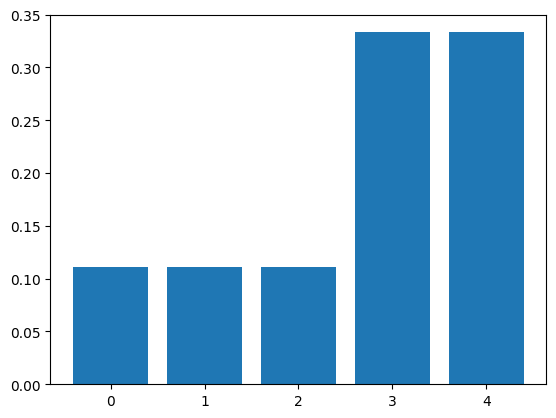

In [153]:
def move(p, U):
    q=np.roll(p,U)
    return q

q = move(q, 2)
plt.bar(range(no_of_blocks), q)

Every time we move there is some uncertainty to the movement, due to measurement uncertainties, etc. We therefore add some uncertainty to the movement. We do this by convolving the uncertainty with the probabilites. We use a scipy filter to do this:

<BarContainer object of 5 artists>

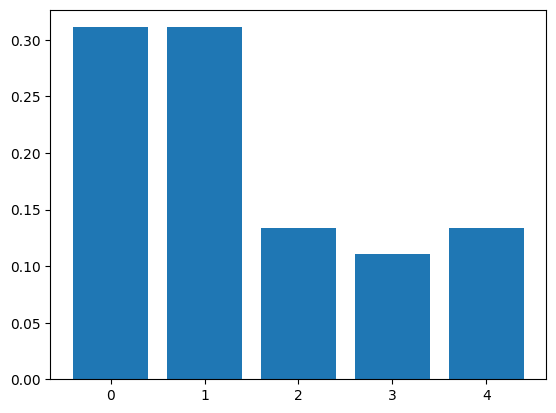

In [154]:
move_uncertainty=[0.1 , 0.8, 0.1]

def move(p, U, move_uncertainty):
    q=np.roll(p,U)
    
    q=ndimage.convolve1d(q,move_uncertainty,mode='wrap')
    
    return q

q = move(q, 2, move_uncertainty)
plt.bar(range(no_of_blocks), q)

Now let's see what happens if we move the robot a thousand times without sensing anything:

<BarContainer object of 5 artists>

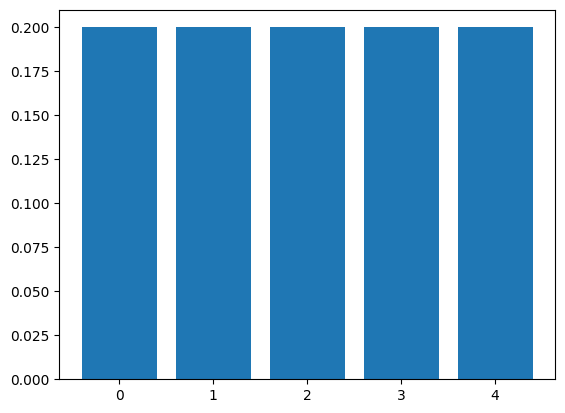

In [155]:
for i in range(1000):
    q = move(q, 2, move_uncertainty)
    
plt.bar(range(no_of_blocks), q)

Let's try both sensing and moving. We write the full code:

[0.11111111 0.33333333 0.33333333 0.11111111 0.11111111]
[0.11111111 0.13333333 0.31111111 0.31111111 0.13333333]


/tmp/ipykernel_20000/1936963015.py:25: DeprecationWarning: Please import `convolve1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  q = ndimage.filters.convolve1d(q, move_uncertainty, mode='wrap')


[0.15789474 0.06315789 0.14736842 0.44210526 0.18947368]
[0.21157895 0.15157895 0.08105263 0.16842105 0.38736842]


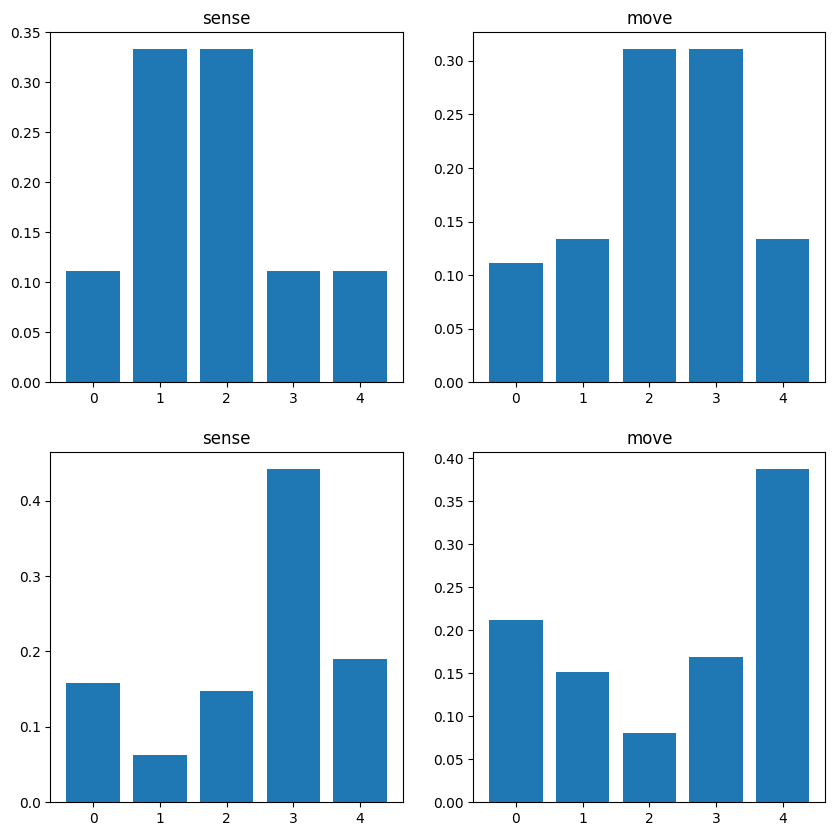

In [156]:
# We define the world, uncertainties, etc. as before.
no_of_blocks = 5
prb = 1/5
p = [prb, prb, prb, prb, prb]
world = ['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'green']
phit = 0.6
pmiss = 0.2
movements = [1, 1]
move_uncertainty = [0.1, 0.8, 0.1]


def sense(p, Z):
    q = []
    for i in range(len(p)):
        hit = (Z == world[i])
        q.append(p[i]*(hit * phit + (1 - hit) * pmiss))

    q = np.array(q)/sum(q)
    return q


def move(p, U, move_uncertainty):
    q = np.roll(p, U)
    q = ndimage.filters.convolve1d(q, move_uncertainty, mode='wrap')
    return q


# We make a loop where we measure and move

plt.figure(figsize=(10,10))

for i in range(len(movements)):
    p = sense(p, measurements[i])
    
    plt.subplot(2, 2, 2 * i + 1)
    plt.bar(range(no_of_blocks), p)
    plt.title("sense")
    
    print(p)
    
    p = move(p, movements[i], move_uncertainty)

    print(p)
    
    plt.subplot(2, 2, 2 * i + 2)
    plt.bar(range(no_of_blocks), p)
    plt.title("move")
    
plt.show()

# plt.bar(range(no_of_blocks), p)

# Exercise 1
We will now extent the histogram plot to work in 2D. You are given the world map and the move function below. We can now move up, down, left and right in the world. We can plot the map with the probabilities by using plt.imshow.
Insert a sense function that will work in 2D, and loop through the measurements and movements, while showing the probabilities using plt.imshow. You will also need to insert a 2D version of the move_uncertainty.

In [157]:
no_of_blocks = 20
prb = 1/20

# The initial probabilities
p=[[prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb]]

p = np.full((4,5), prb)


# The world map
world = [['red', 'green', 'green', 'red',   'red'],
         ['red', 'red',   'green', 'red',   'red'],
         ['red', 'red',   'green', 'green', 'red'],
         ['red', 'red',   'red',   'red',   'red']]

world = np.array(world)

# measurements=['red','green', 'green', 'green']
# measurements=['green','green', 'green', 'green']
measurements=['red','red', 'red', 'red']


measurements = np.array(measurements)
phit=0.6
pmiss=0.2
movements =['up', 'up', 'up', 'left']

movements = np.array(movements)

# Define move_uncertainty
move_uncertainty=[0.0 , 0.05, 0.0,
                  0.05 , 0.8, 0.05,
                  0.0 , 0.05, 0.0]

move_uncertainty = np.array(move_uncertainty).reshape((3,3))

def sense(p, Z):
    q = []
    for i in range(len(p)):
        hit = (Z == world[i])
        q.append(p[i]*(hit * phit + (1 - hit) * pmiss))

    q = np.array(q)/sum(q)
    return q

def sense(p, Z, world, phit, pmiss):
    q = np.zeros_like(p)
    for i in range(world.shape[0]):
        for j in range(world.shape[1]):
            hit = (Z == world[i, j])
            q[i, j] = p[i, j] * (hit * phit + (1 - hit) * pmiss)

    q = q / np.sum(q)
    return q
    
    
    
def move(p, u, move_uncertainty):
    if u == 'up':
        q = np.roll(p, -1, axis=0)
    elif u== 'down':
        q = np.roll(p, 1, axis=0)
    elif u == 'right':
        q = np.roll(p, 1, axis=1)
    elif u == 'left':
        q = np.roll(p, -1, axis=1)
    q = signal.convolve2d(q, move_uncertainty, boundary='wrap', mode='same')
    return q


In [158]:
def plot_sense_and_move(measurements, movements, p, world, phit, pmiss, move_uncertainty):
    """
    Plots the probability distributions for a series of sensing and movement steps.

    Parameters:
    - measurements: List or array of measurements (e.g., 'red' or 'green').
    - movements: List or array of movement directions (e.g., 'up', 'down', 'left', 'right').
    - p: Initial probability distribution (2D array).
    - world: 2D array representing the world map (color grid).
    - phit: Probability of a hit when sensing the correct color.
    - pmiss: Probability of a miss when sensing the incorrect color.
    - move_uncertainty: 2D array representing the move uncertainty matrix.
    """
    plt.figure(figsize=(12, 10))

    for i in range(len(movements)):
        # Update the probability distribution with sensing
        p = sense(p, measurements[i], world, phit, pmiss)
        
        # Plot the updated probability distribution after sensing
        plt.subplot(len(movements), 2, 2 * i + 1)
        plt.imshow(p, cmap='gray', interpolation='nearest')
        plt.colorbar()
        plt.title(f"Sensing Step {i+1}: Measurement = {measurements[i]}")
        
        # Print the probability distribution after sensing
        # print(f"After sensing step {i+1}:\n", p)
        
        # Update the probability distribution with movement
        p = move(p, movements[i], move_uncertainty)

        # Print the probability distribution after movement
        # print(f"After moving step {i+1}:\n", p)
        
        # Plot the updated probability distribution after movement
        plt.subplot(len(movements), 2, 2 * i + 2)
        plt.imshow(p, cmap='gray', interpolation='nearest')
        plt.colorbar()
        plt.title(f"Movement Step {i+1}: Direction = {movements[i]}")

    plt.tight_layout()
    plt.show()

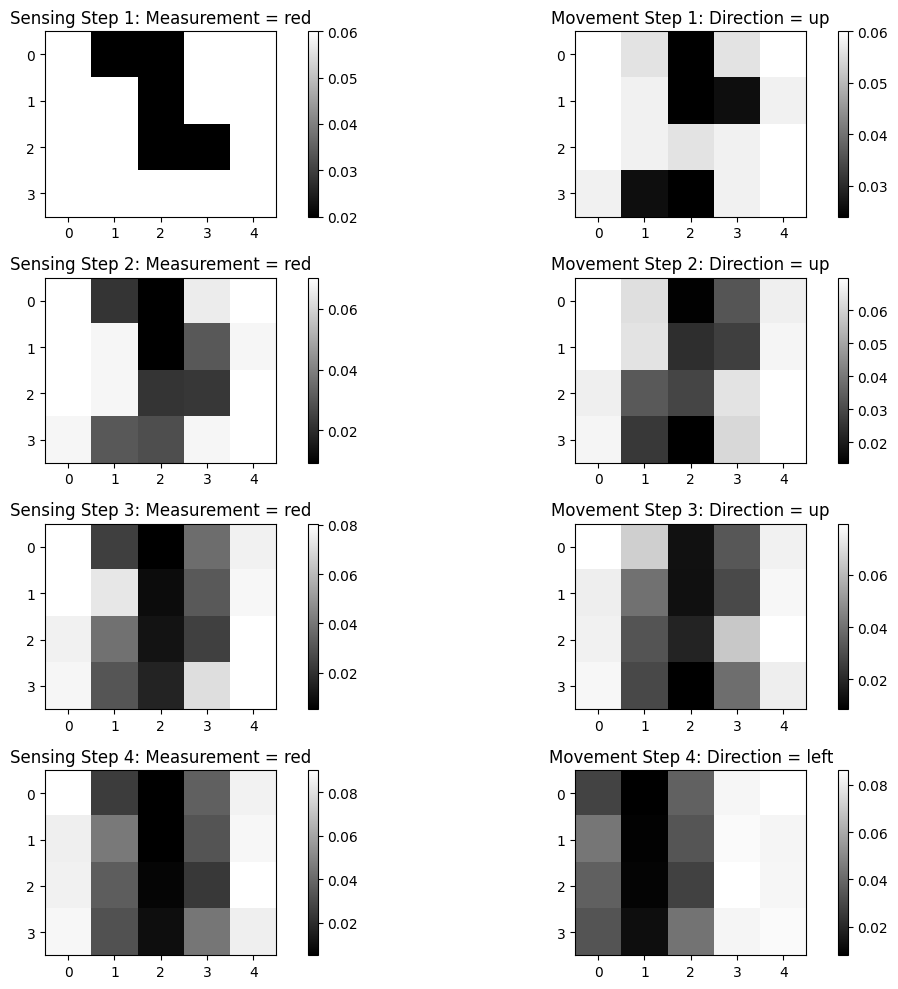

In [159]:
plot_sense_and_move(measurements, movements, p, world, phit, pmiss, move_uncertainty)

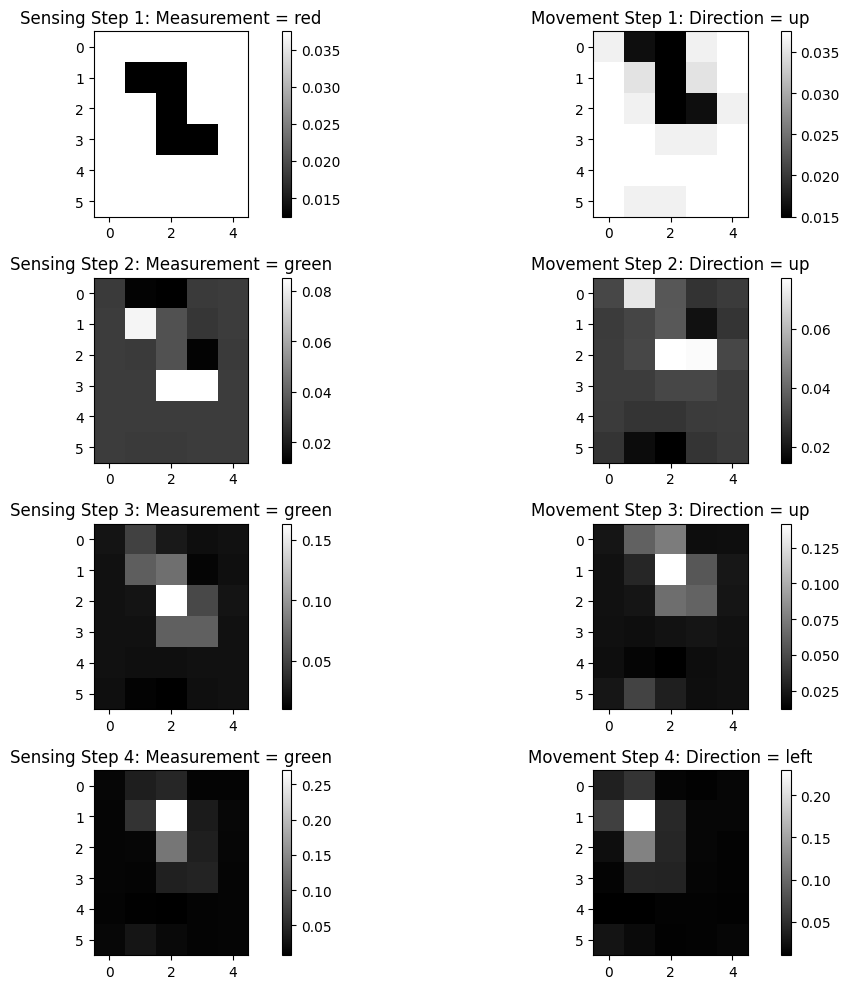

In [174]:
# measurements=['red','red', 'red', 'red']
# measurements=['green','green', 'green', 'green']
measurements=['red','green', 'green', 'green']
# measurements=['green','red', 'red', 'red']

measurements = np.array(measurements)

movements =['up', 'up', 'up', 'left']
movements = np.array(movements)

plot_sense_and_move(measurements, movements, p, world, phit, pmiss, move_uncertainty)

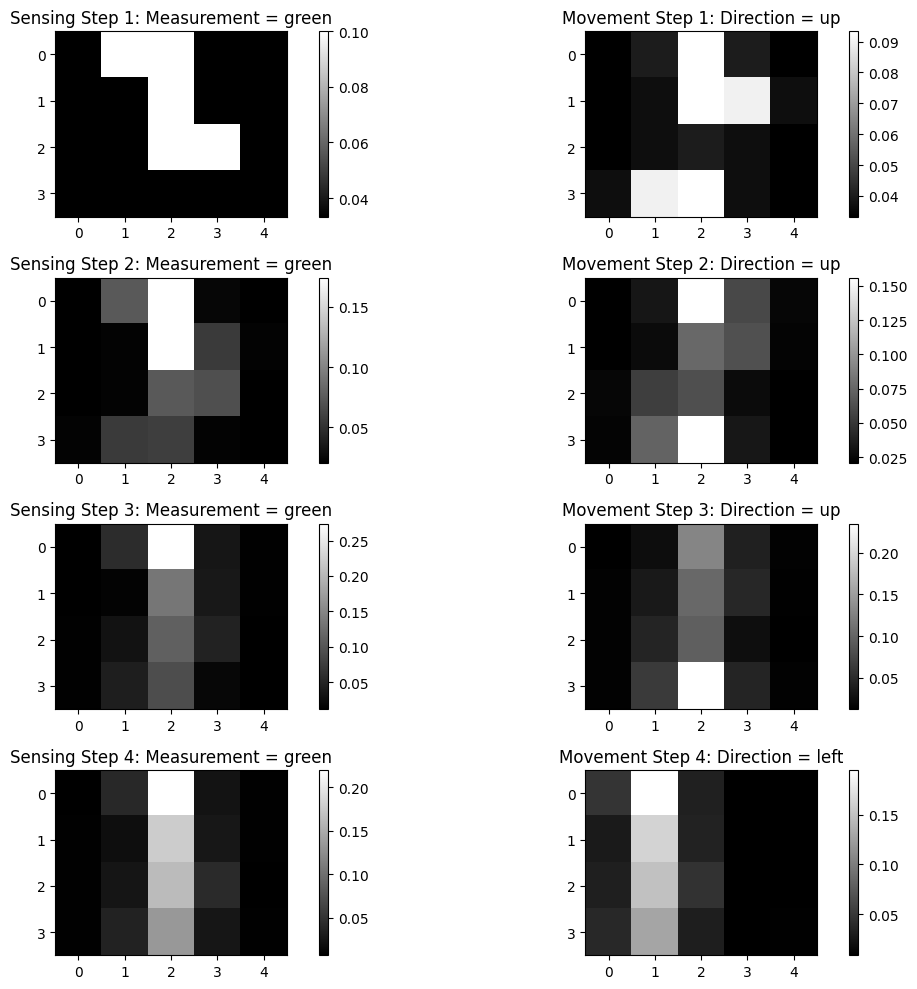

In [161]:
# measurements=['red','red', 'red', 'red']
measurements=['green','green', 'green', 'green']
# measurements=['red','green', 'green', 'green']

measurements = np.array(measurements)

movements =['up', 'up', 'up', 'left']
movements = np.array(movements)

plot_sense_and_move(measurements, movements, p, world, phit, pmiss, move_uncertainty)

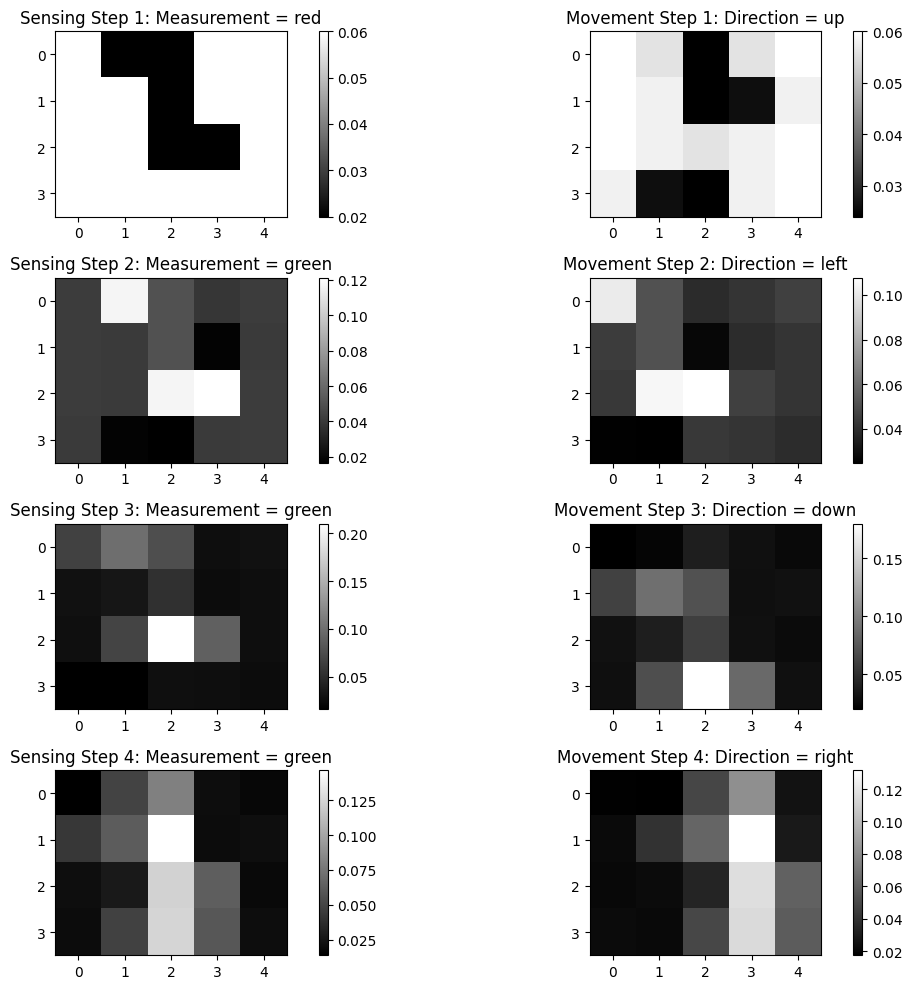

In [162]:
# measurements=['red','red', 'red', 'red']
# measurements=['green','green', 'green', 'green']
measurements=['red','green', 'green', 'green']

measurements = np.array(measurements)

movements =['up', 'left', 'down', 'right']
movements = np.array(movements)

plot_sense_and_move(measurements, movements, p, world, phit, pmiss, move_uncertainty)

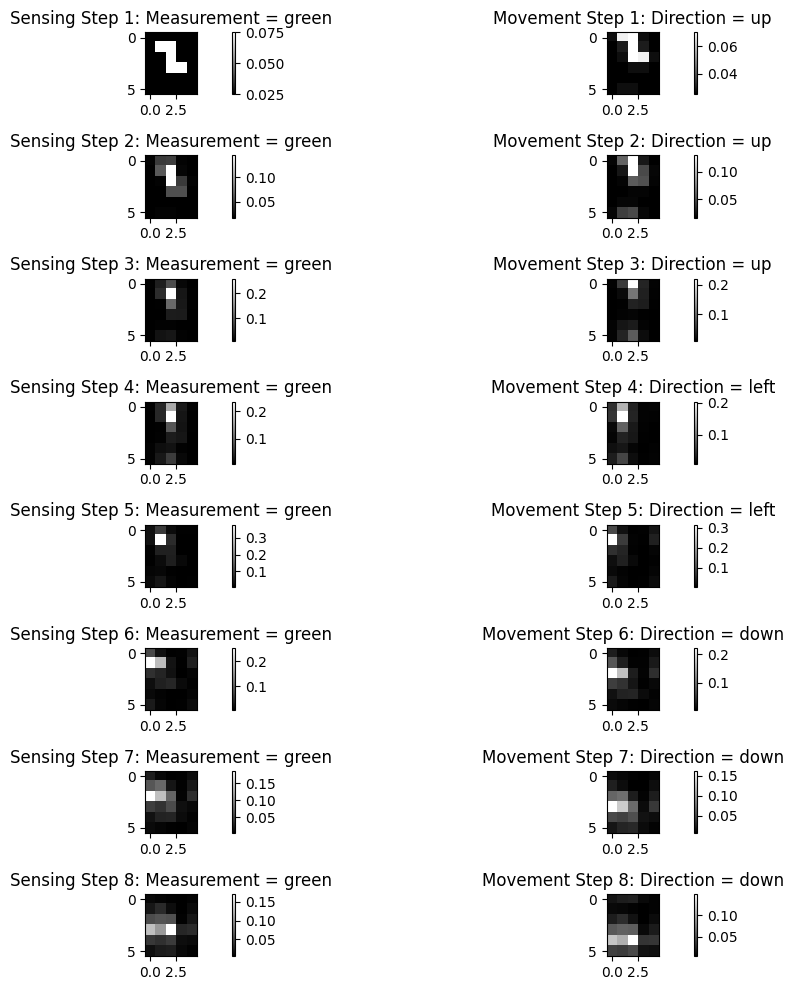

In [181]:
world = [['red', 'red',   'red',   'red',   'red'],
         ['red', 'green', 'green', 'red',   'red'],
         ['red', 'red',   'green', 'red',   'red'],
         ['red', 'red',   'green', 'green', 'red'],
         ['red', 'red',   'red',   'red',   'red'],
         ['red', 'red',   'red',   'red',   'red']]

world = np.array(world)

no_of_blocks = 30
prb = 1/no_of_blocks

# The initial probabilities
p=[[prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb],]

# p = np.full((5,6), prb)
p = np.array(p)

# measurements=['red','red', 'red', 'red', 'red', 'red', 'red', 'red']
measurements=['green','green', 'green', 'green', 'green', 'green', 'green', 'green']
# measurements=['red','green', 'green', 'green', 'green', 'green', 'green', 'green']

measurements = np.array(measurements)

movements =['up', 'up', 'up', 'left', 'left', 'down', 'down', 'down']
movements = np.array(movements)

plot_sense_and_move(measurements, movements, p, world, phit, pmiss, move_uncertainty)

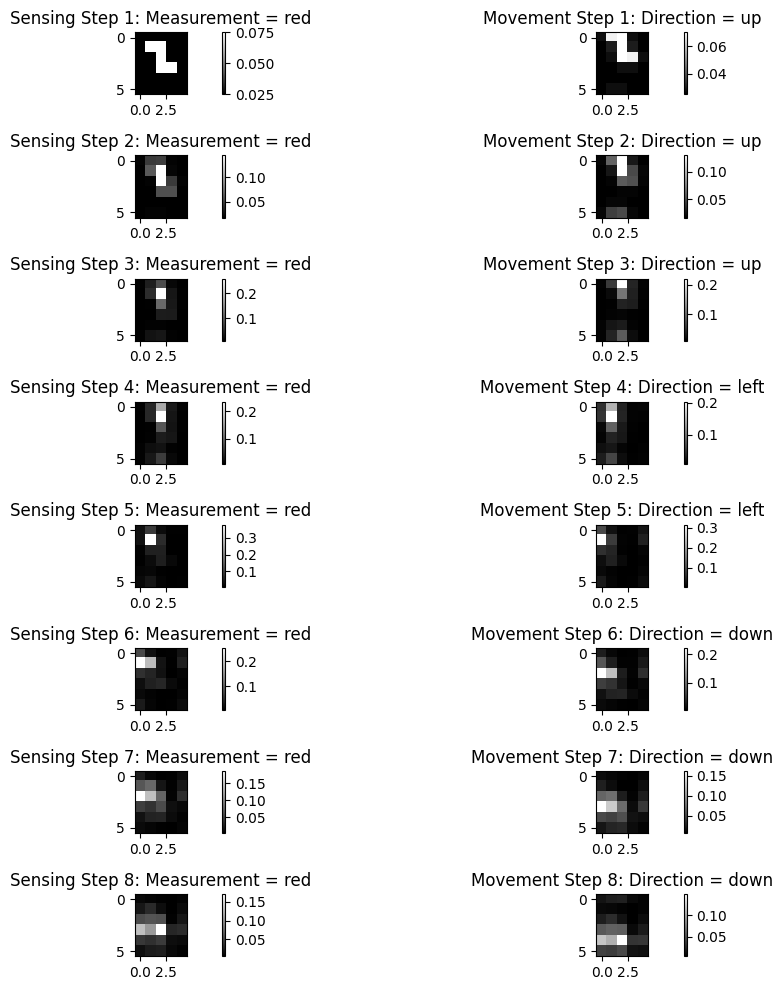

In [185]:
world = [['green', 'green', 'green', 'green', 'green'],
 ['green', 'red',   'red',   'green', 'green'],
 ['green', 'green', 'red',   'green', 'green'],
 ['green', 'green', 'red',   'red',   'green'],
 ['green', 'green', 'green', 'green', 'green'],
 ['green', 'green', 'green', 'green', 'green']]


world = np.array(world)

no_of_blocks = 30
prb = 1/no_of_blocks

# The initial probabilities
p=[[prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb],]

# p = np.full((5,6), prb)
p = np.array(p)

measurements=['red','red', 'red', 'red', 'red', 'red', 'red', 'red']
# measurements=['green','green', 'green', 'green']
# measurements=['red','green', 'green', 'green', 'green', 'green', 'green', 'green']

measurements = np.array(measurements)

movements =['up', 'up', 'up', 'left', 'left', 'down', 'down', 'down']
movements = np.array(movements)

plot_sense_and_move(measurements, movements, p, world, phit, pmiss, move_uncertainty)

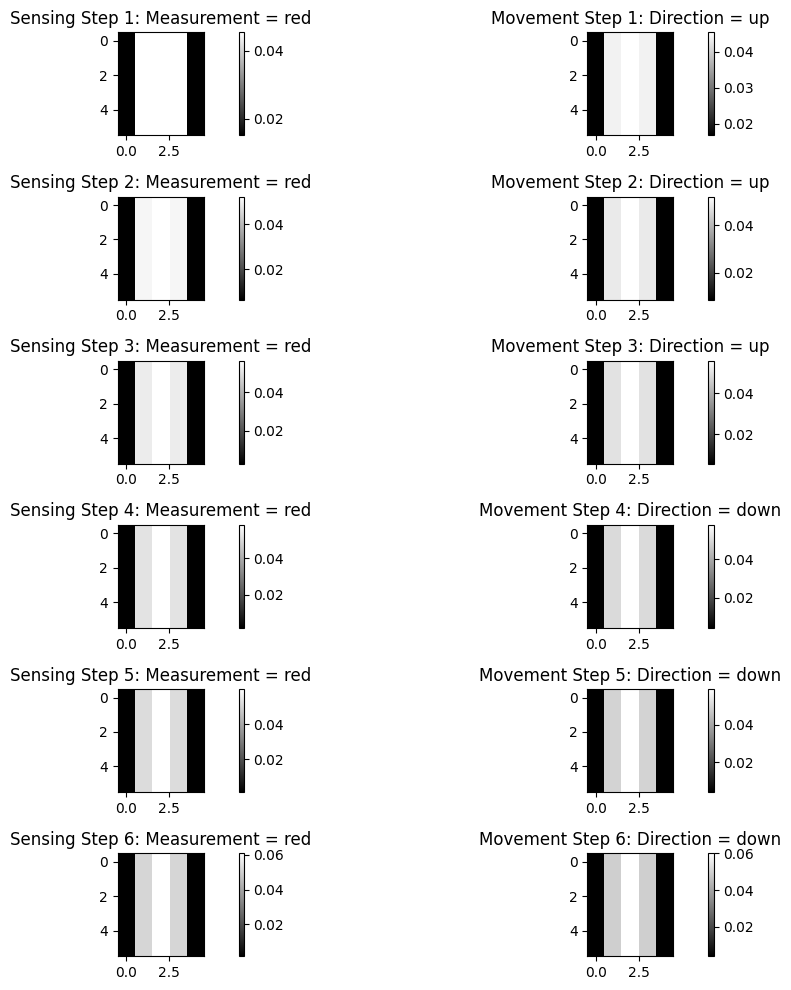

In [188]:
world = [['green', 'red', 'red', 'red', 'green'],
         ['green', 'red', 'red', 'red', 'green'],
         ['green', 'red', 'red', 'red', 'green'],
         ['green', 'red', 'red', 'red', 'green'],
         ['green', 'red', 'red', 'red', 'green'],
         ['green', 'red', 'red', 'red', 'green']]


world = np.array(world)

no_of_blocks = 30
prb = 1/no_of_blocks

# The initial probabilities
p=[[prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb],
   [prb, prb, prb, prb, prb],]

# p = np.full((5,6), prb)
p = np.array(p)

measurements=['red','red', 'red', 'red', 'red', 'red']
# measurements=['green','green', 'green', 'green']
# measurements=['red','green', 'green', 'green', 'green', 'green', 'green', 'green']

measurements = np.array(measurements)

movements =['up', 'up', 'up', 'down', 'down', 'down']
movements = np.array(movements)

plot_sense_and_move(measurements, movements, p, world, phit, pmiss, move_uncertainty)